In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_ring(a1, b1, ecc, inc, ring_ratio, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    inc_rad = np.radians(inc)
    cos_inc = np.cos(-inc_rad)  # negative sign to invert the angle
    sin_inc = np.sin(-inc_rad)  
    
    def transform(x, y, x0, y0, cos_inc, sin_inc):
        norm_x = x - x0
        norm_y = y - y0
        transformed_x = norm_x * cos_inc - norm_y * sin_inc
        transformed_y = norm_x * sin_inc + norm_y * cos_inc
        return transformed_x, transformed_y

    # Outer ellipse
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a1**2 * (1 - ecc**2)) + transformed_y**2 / (b1**2) <= 1:
                dist = np.sqrt((x - x0)**2 + (y - y0)**2)
                intensity = 50 + 200 * np.exp(-dist**2 / (2 * (0.1 * width)**2))
                array[y, x] = intensity
    
    # Inner ellipse
    a2 = a1 * ring_ratio
    b2 = b1 * ring_ratio
    
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a2**2 * (1 - ecc**2)) + transformed_y**2 / (b2**2) <= 1:
                array[y, x] = 0
    
    return array

In [3]:
def create_gap(a1, b1, ecc, inc, gap_ratio, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    inc_rad = np.radians(inc)
    cos_inc = np.cos(-inc_rad)  # negative sign to invert the angle
    sin_inc = np.sin(-inc_rad)
    
    def transform(x, y, x0, y0, cos_inc, sin_inc):
        norm_x = x - x0
        norm_y = y - y0
        transformed_x = norm_x * cos_inc - norm_y * sin_inc
        transformed_y = norm_x * sin_inc + norm_y * cos_inc
        return transformed_x, transformed_y

    # Outer ellipse
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a1**2 * (1 - ecc**2)) + transformed_y**2 / (b1**2) <= 1:
                array[y, x] = 0
    
    # Inner ellipse
    a2 = a1 * gap_ratio
    b2 = b1 * gap_ratio
    
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a2**2 * (1 - ecc**2)) + transformed_y**2 / (b2**2) <= 1:
                array[y, x] = 0
    
    return array

In [4]:
width, height = 200, 200
ring1 = create_ring(72, 49, 0.3, 40, 0.96, width, height)
ring2 = create_ring(65, 45, 0.3, 40, 0.93, width, height)
ring3 = create_ring(56, 40, 0.3, 40, 0.97, width, height)
ring4 = create_ring(49, 35, 0.3, 40, 0.9, width, height)
ring5 = create_ring(44, 31, 0.3, 40, 0.8, width, height)
ring6 = create_ring(35, 25, 0.3, 40, 0.7, width, height)
ring7 = create_ring(20, 15, 0.3, 40, 0.45, width, height)

In [5]:
hl_tauri_rings = ring1 + ring2 + ring3 + ring4 + ring5 + ring6 + ring7

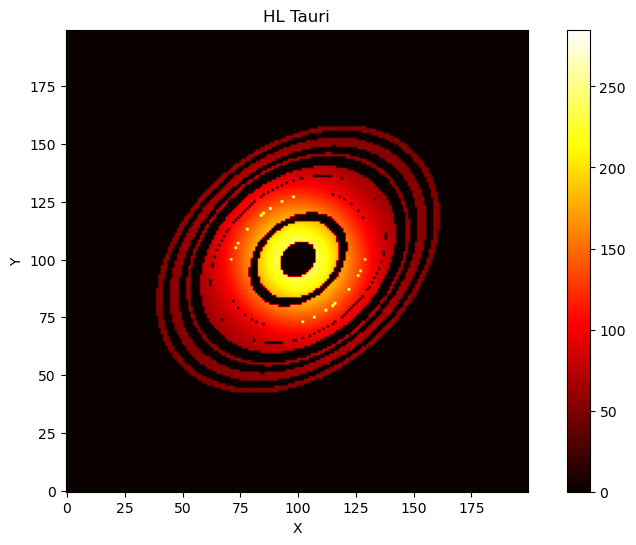

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(hl_tauri_rings, cmap='hot', origin='lower')
plt.title('HL Tauri')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [7]:
width, height = 2000, 2000
ring1 = create_ring(720, 490, 0.3, 40, 0.96, width, height)
ring2 = create_ring(650, 450, 0.3, 40, 0.93, width, height)
ring3 = create_ring(560, 400, 0.3, 40, 0.97, width, height)
ring4 = create_ring(490, 348, 0.3, 40, 0.9, width, height)
ring5 = create_ring(440, 313, 0.3, 40, 0.8, width, height)
ring6 = create_ring(350, 250, 0.3, 40, 0.7, width, height)
ring7 = create_ring(200, 150, 0.3, 40, 0.45, width, height)

In [8]:
hl_tauri_rings = ring1 + ring2 + ring3 + ring4 + ring5 + ring6 + ring7

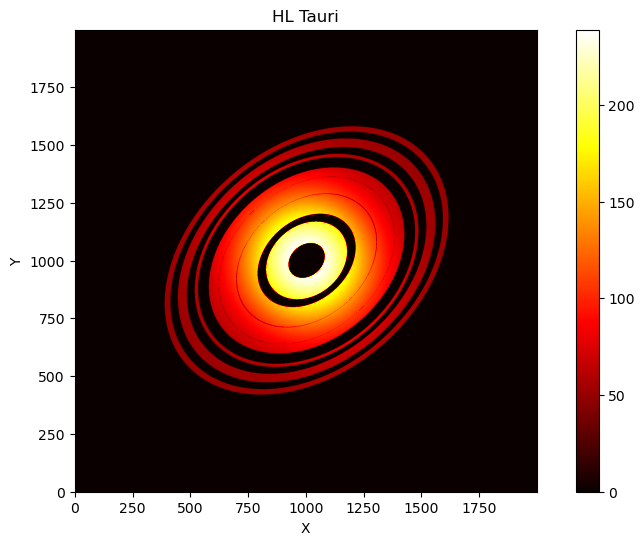

In [9]:
plt.figure(figsize=(10, 6))
plt.imshow(hl_tauri_rings, cmap='hot', origin='lower')
plt.title('HL Tauri')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [10]:
import scopesim as sim
from astropy import units as u
from scopesim.source import source_templates as sim_tp
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.wcs import WCS

In [11]:
src_star = sim_tp.star(flux=10*u.ABmag)

In [12]:
filename = 'ring1.fits'
hdu1 = fits.PrimaryHDU(ring1)
hdu1.writeto(filename, overwrite=True)

In [13]:
filename = 'ring2.fits'
hdu2 = fits.PrimaryHDU(ring2)
hdu2.writeto(filename, overwrite=True)

In [14]:
filename = 'ring3.fits'
hdu3 = fits.PrimaryHDU(ring3)
hdu3.writeto(filename, overwrite=True)

In [15]:
filename = 'ring4.fits'
hdu4 = fits.PrimaryHDU(ring4)
hdu4.writeto(filename, overwrite=True)

In [16]:
filename = 'ring5.fits'
hdu5 = fits.PrimaryHDU(ring5)
hdu5.writeto(filename, overwrite=True)

In [17]:
filename = 'ring6.fits'
hdu5 = fits.PrimaryHDU(ring6)
hdu5.writeto(filename, overwrite=True)

In [18]:
filename = 'ring7.fits'
hdu5 = fits.PrimaryHDU(ring7)
hdu5.writeto(filename, overwrite=True)

In [61]:
flux_src = 1e-5*u.Jy

In [62]:
hdul1 = fits.open('ring1.fits') 
hdul1[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul1[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul1[0].header["CRVAL1"] = 0
hdul1[0].header["CRVAL2"] = 0
hdul1[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul1[0].header["CRPIX2"] = 1000.5
hdul1[0].header["CUNIT1"] = "deg"
hdul1[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring1 = sim.Source(image_hdu=hdul1[0], flux=flux_src)

In [63]:
hdul2 = fits.open('ring2.fits') 
hdul2[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul2[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul2[0].header["CRVAL1"] = 0
hdul2[0].header["CRVAL2"] = 0
hdul2[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul2[0].header["CRPIX2"] = 1000.5
hdul2[0].header["CUNIT1"] = "deg"
hdul2[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring2 = sim.Source(image_hdu=hdul2[0], flux=flux_src)

In [64]:
hdul3 = fits.open('ring3.fits') 
hdul3[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul3[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul3[0].header["CRVAL1"] = 0
hdul3[0].header["CRVAL2"] = 0
hdul3[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul3[0].header["CRPIX2"] = 1000.5
hdul3[0].header["CUNIT1"] = "deg"
hdul3[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring3 = sim.Source(image_hdu=hdul3[0], flux=flux_src)

In [65]:
hdul4 = fits.open('ring4.fits') 
hdul4[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul4[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul4[0].header["CRVAL1"] = 0
hdul4[0].header["CRVAL2"] = 0
hdul4[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul4[0].header["CRPIX2"] = 1000.5
hdul4[0].header["CUNIT1"] = "deg"
hdul4[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring4 = sim.Source(image_hdu=hdul4[0], flux=flux_src)

In [66]:
hdul5 = fits.open('ring5.fits') 
hdul5[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul5[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul5[0].header["CRVAL1"] = 0
hdul5[0].header["CRVAL2"] = 0
hdul5[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul5[0].header["CRPIX2"] = 1000.5
hdul5[0].header["CUNIT1"] = "deg"
hdul5[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring5 = sim.Source(image_hdu=hdul5[0], flux=flux_src)

In [67]:
hdul6 = fits.open('ring6.fits') 
hdul6[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul6[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul6[0].header["CRVAL1"] = 0
hdul6[0].header["CRVAL2"] = 0
hdul6[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul6[0].header["CRPIX2"] = 1000.5
hdul6[0].header["CUNIT1"] = "deg"
hdul6[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring6 = sim.Source(image_hdu=hdul6[0], flux=flux_src)

In [68]:
hdul7 = fits.open('ring7.fits') 
hdul7[0].header["CDELT1"] = (0.0057 / 3600) / 2  #CD1_1 
hdul7[0].header["CDELT2"] = (0.0057 / 3600) / 2  #CD2_2 #für metis 0.0057 / 3600
hdul7[0].header["CRVAL1"] = 0
hdul7[0].header["CRVAL2"] = 0
hdul7[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul7[0].header["CRPIX2"] = 1000.5
hdul7[0].header["CUNIT1"] = "deg"
hdul7[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring7 = sim.Source(image_hdu=hdul7[0], flux=flux_src)

In [69]:
src = src_star + src_ring1 + src_ring2 + src_ring3 + src_ring4 + src_ring5 + src_ring6 + src_ring7

In [70]:
#src.shift(1, 1)

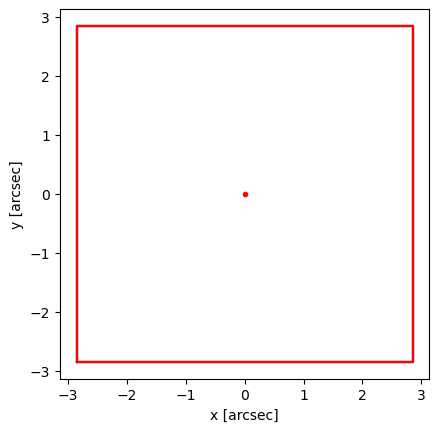

In [71]:
src.plot()

L-Band Imaging

In [72]:
cmd_l = sim.UserCommands(use_instrument='METIS', set_modes=['img_lm'], 
                        properties={"!OBS.exptime": 3600})
metis_l = sim.OpticalTrain(cmd_l)
metis_l['skycalc_atmosphere'].include=False
metis_l['detector_linearity'].include=False
metis_l['psf'].include=True
metis_l['adc_wheel'].include=True
metis_l['cold_stop'].include=True
metis_l['quantization'].include=False

In [73]:
metis_l.observe(src)
hdus_l = metis_l.readout()

 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


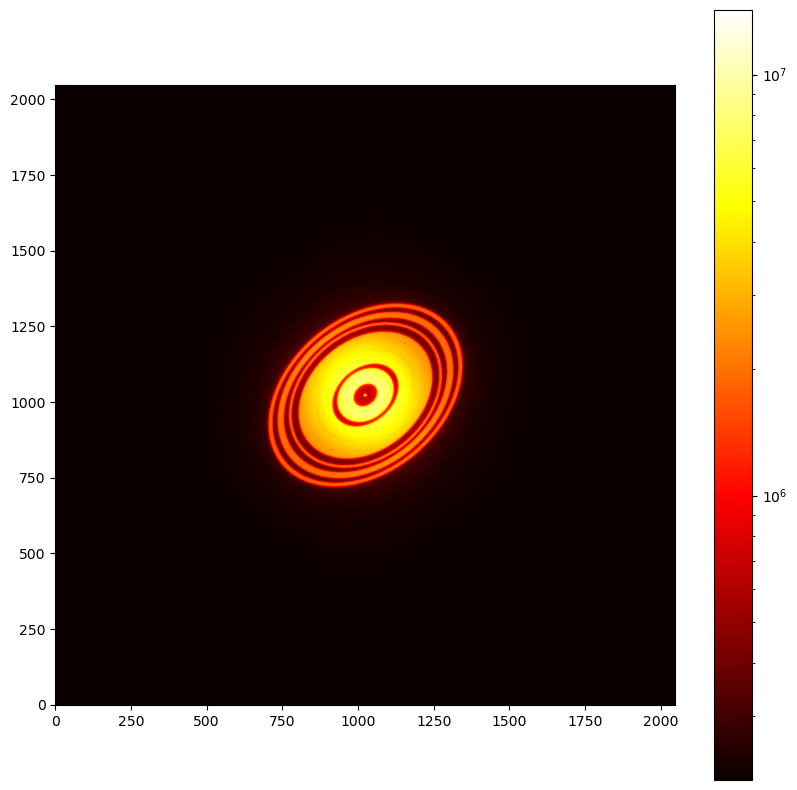

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_l[0][1].data, norm=LogNorm(), origin='lower', cmap='hot')
plt.colorbar()

In [75]:
metis_l.effects

element,name,class,included
str16,str27,str28,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,False
ELT,telescope_reflection,SurfaceList,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [const_90],ADCWheel,True
METIS,slit_wheel : [False],SlitWheel,False
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS_IMG_LM,img_lm_optics,SurfaceList,True
METIS_IMG_LM,filter_wheel : [Lp],FilterWheel,True


In [76]:
cmd_n = sim.UserCommands(use_instrument='METIS', set_modes=['img_n'], 
                        properties={"!OBS.exptime": 3600})
metis_n = sim.OpticalTrain(cmd_n)
metis_n['skycalc_atmosphere'].include=False
metis_n['detector_linearity'].include=False
metis_n['chop_nod'].include=False
metis_n['detector_readout_parameters'].include=False
metis_n['quantization'].include=False

In [77]:
metis_n.observe(src)
hdus_n = metis_n.readout()

 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.24s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


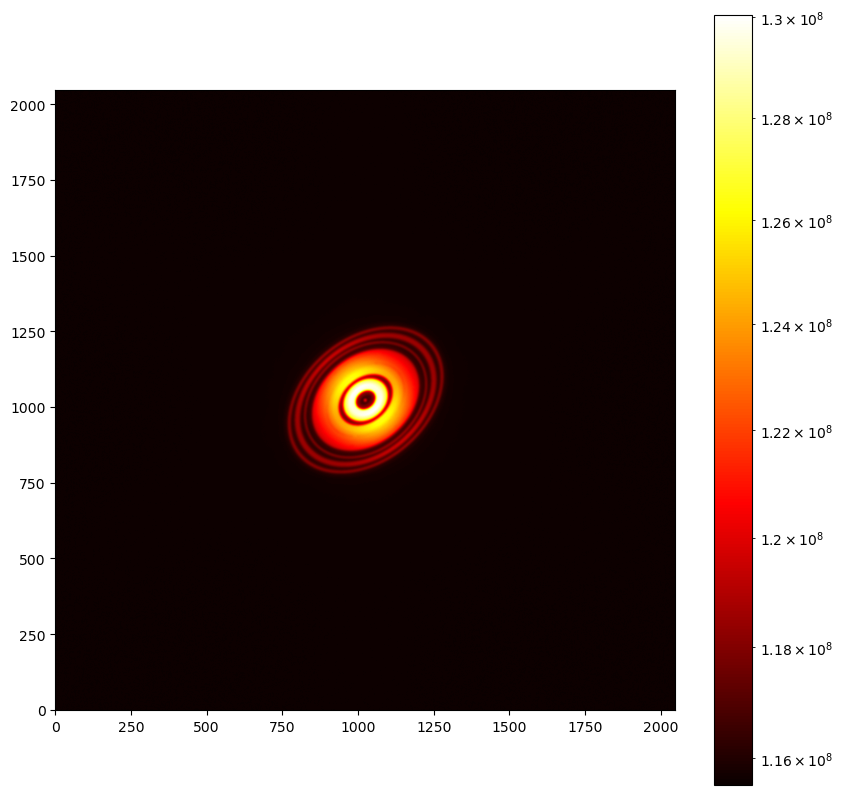

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_n[0][1].data, norm=LogNorm(), origin='lower', cmap='hot')
plt.colorbar()

In [79]:
metis_n.effects

element,name,class,included
str23,str27,str28,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,False
ELT,telescope_reflection,SurfaceList,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [False],ADCWheel,False
METIS,slit_wheel : [False],SlitWheel,False
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS_IMG_N,img_n_optics,SurfaceList,True
METIS_IMG_N,filter_wheel : [N2],FilterWheel,True
